## Practical Exercises with SVMs

In this final section, we will engage in practical exercises that involve building, tuning, and evaluating SVM models on various datasets. These exercises are designed to reinforce the concepts learned throughout the chapter and demonstrate how to effectively apply SVMs in different scenarios. By the end of this section, we will have hands-on experience that can be leveraged in our own ML projects.

### Exercise 1: Building a Simple SVM Classifier
In this exercise, we will build a simple SVM classifier using the Iris dataset.

In [1]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

# Create and train a SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.91      0.83      0.87        12
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



### Exercise 2: Tuning SVM Parameters with Grid Search
In this exercise, we will tune SVM parameters using grid search on the Breast Cancer dataset.

In [2]:
# Load the libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

# Define a hyperparameter for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)


# Train a new model with the best hyperparameters
best_model = SVC(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")
print("Best Model Classification Report:")
print(report_best)


Best Model Accuracy: 0.95
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.96      0.95      0.96       104

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



### Exercise 3: Visualizing SVM Decision Boundaries
In this exercise, we will visualize the decision boundaries of an SVM model trained on a synthetic dataset.

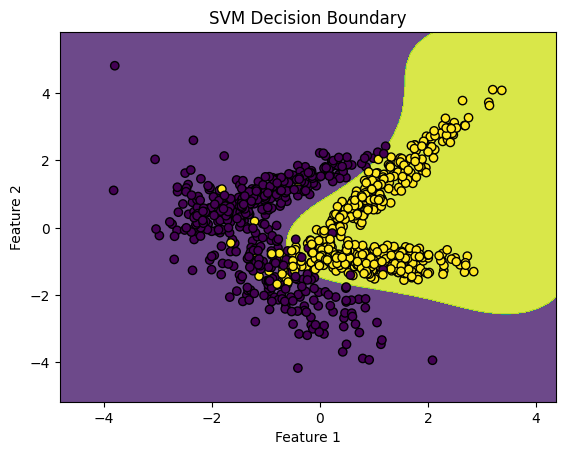

In [5]:
# Load libraries for visualization and dataset creation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=2024)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

# Create and train an SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class probabilities across the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
